<a href="https://colab.research.google.com/github/Redhoxx/VUT_ML/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF, Lab 4 - Feedforward Neural Networks

These exercises are focused on dealing with neural networks. It is strongly recommended to use google collab for these pc labs. Why? Google collab offers a free GPU capacity to train machine learning models. Training NN on GPU can drastically speed up the training process. You can turn on the GPU accelerator in: Runtime -> Change runtime type -> GPU,

## The basic terminology

### Neural Networks

Think of a neural network as a complex web of neurons (or nodes) that are interconnected to process information, similar to how the human brain works. Each neuron in this network can receive inputs, process them, and pass on the output to other neurons. The goal of a neural network is to transform the inputs (e.g., images, texts, numbers) into a desired output (e.g., identifying what's in an image, translating text, etc.).

![title](img/network.png)

### Layers

A neural network is made up of layers: the input layer (where the data enters the network), one or more hidden layers (where most of the processing happens), and the output layer (where the final prediction is made). You can think of each layer as a filter that increasingly refines the information as it passes through the network. In our case, we will discuss feedforward, fully-connected neural networks. Fully connected means that every neuron in layer *n* is connected by a weighted connection with all neurons in the layers *n+1*. Feedforward means that data are passed in one direction only, there are no reccurent connections (feedback loops) exist.

![title](img/Neural_network.png)

### Neuron

A neuron, or node, is the basic unit of a neural network. It receives input, applies a weight (significance) to that input, adds a bias (a constant value to ensure the neuron activates correctly), and then uses an activation function to determine whether and how strongly to pass its signal to the next layer. Each neuron contributes to the network's ability to make accurate predictions or decisions.|

![title](img/neuron.png)

### Neuron in the input layer

In the input layer the input neurons are composed of identity only, that means everying that comes to the input comes directly to the output

### Training

Training a neural network involves feeding it with data for which the correct output is known, allowing the network to adjust its weights and biases to minimize the difference between its predictions and the actual truths. This process is repeated numerous times with many data examples.

### Loss Function

A loss function measures how well the neural network is performing, meaning how close or far its predictions are from the actual values. The goal of training is to minimize this loss, or error, making the network's predictions as accurate as possible.

## Exercise 1 - XOR problem

During the last lecture, we saw that the single perceptron model with a step function could be used only for solving linearly-separable classification problems. Because of that, a single perceptron can not be trained to be able to behave like an XOR gate. To approximate the XOR gate using a neural network, we need to use the following structure:

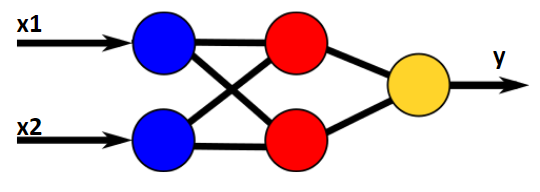

The above structure contains three layers: two neurons in the input layer (blue), two in the hidden layer and one in the output layer (yellow). The input layer represents the identity functions (the outputs are equal to the inputs)

We will use *Keras* API to build and train our neural network. Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks and provides a high-level API for building and training neural networks.

### 0. First import libraries

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

### 1. prepare data

In this part, the task would be to prepade our dataset, basically it is the logic table for *XOR* function

In [184]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

### 2. Creating the model

To create a model of NN that is in the picture above, run the following cell

In [185]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


**Sequential** is a model type used in Keras for building feedforward neural networks. It is called "sequential" because the layers are stacked sequentially on top of each other, and the output of one layer is passed as input to the next layer.

To create a sequential model, instantiate a Sequential object and then add layers to it using the **add()** method. There are many layers that Keras offers. We will use *Dense layer*

**Dense layer** represents a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. In each layer, we will specify an activation function and the number of neurons that layer contains. The input layer is not defined as a dense layer, but instead of that, we will specify the *input_dim* parameter in the layer that follows the input layer. *input_dim* parameter specifies the number of neurons in the input layer

### 3. Compile the model

To compile yor model run:

In [186]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**keras.complile()** is used to configure the learning process before training the model.
We need to specify 3 parameters:
- *loss*, *optimizer* and *metrics*

- as our loss function (error function/objective function), we will choose *binary_crossentropy* - loss function often used for binary classification

- *optimizer* is optimization algorithm used for optimizing weights in our training process, we will choose *stochastic gradient descent*

- *metrics* is metric user for model evaluation


### 4. Model training

In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

1. Weight initialization
2. Forward Propagation
3. Compute Loss
4. Backpropagation
5. Update Weights
6. Repeat 2->6 until maximum epochs are reached

When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch.

For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times

To train your model, run the following line of the code:

In [187]:
history = model.fit(X, y, epochs=500, batch_size=16, verbose=0)

the method **.fit()**, is used to train the model. We can see that it takes several input parameters:
 - *X* - input data
 - *y* - label for the input data
 - *epochs* number of training epochs (iterations)
 - *batch_size* - number of samples in each batch
 - *verbose* - set verbose parameter to see the progress of loss and metrics during the training epochs

These are not the only parameters the .fit() method can take. Check official documentation: https://keras.io/api/models/model_training_apis/

We will set the output of our .fit() function to variable *history*, where the loss and other metrics defined above in the .compile() function during the training are saved.

### 5. Model evaluation

Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

In [188]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 75.00


### 6. Model predictions

In [189]:
for id_x, data_sample in enumerate(X):
  data_sample = np.array(data_sample).reshape(1,-1)
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Data sample is [[0. 0.]], prediction from model [[0.43518326]], ground_truth 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_38
Received: inputs=('Tensor(shape=(1, 2))',)
  warnings.warn(msg)


Data sample is [[0. 1.]], prediction from model [[0.43518326]], ground_truth 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Data sample is [[1. 0.]], prediction from model [[0.69852847]], ground_truth 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Data sample is [[1. 1.]], prediction from model [[0.43518326]], ground_truth 0.0


### 7. Display loss function during the training process and acuracy

Text(0, 0.5, 'loss')

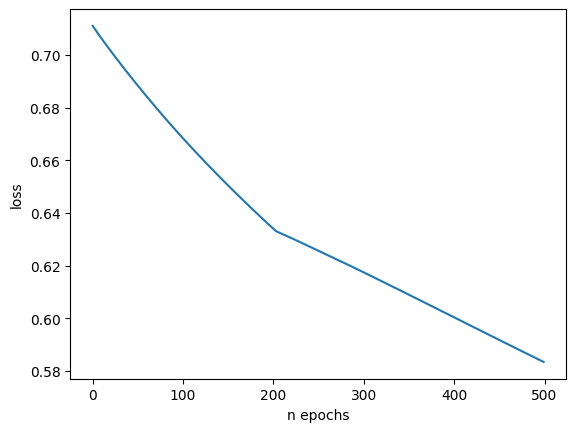

In [190]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

### TASK:

In this part of the exercise, the task would be to play around with the code above to see the influence of hyperparameters.

As we know from the lecture, neural networks contain two types of parameters:
  1. **Learnable parameters** - *weights* and *biases*. these parameters are adjusted in the training process.  
  2. **Non-learnable parameters (hyperparameters)** - learning_rate, number_of_neurons, number_of_layers, number_of_epochs, type of activation functions in the neurons.., basically any user-defined setting is considered to be hyperparameter


Change the following parameters:
- number of epochs
- learning_rate
- activation functions in layers,
- batch_size,
- verbose,
- number of neurons in the hidden layer

Moreover, see the influence on the training process and results.

**Note: Every time we change some hyper-parameters, do not forget to compile the model, to initialize the learnable parameters again**

## Exercise 2 - Congressional Voting Data

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is *republican* or *democrat* based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [191]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. Loading dataset

**First mount your google drive to google colab file.**

In [192]:
path_to_dataset = 'voting_complete.csv'
df = pd.read_csv(path_to_dataset)

In [193]:
print('\n'.join(df.columns))
print(f"\ndf size : {len(df)}")
df.head(5)

Unnamed: 0
Class Name
handicapped-infants
water-project-cost-sharing
adoption-of-the-budget-resolution
physician-fee-freeze
el-salvador-aid
religious-groups-in-schools
anti-satellite-test-ban
aid-to-nicaraguan-contras
mx-missile
immigration
synfuels-corporation-cutback
education-spending
superfund-right-to-sue
crime
duty-free-exports
export-administration-act-south-africa

df size : 435


,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### 4. Data preprocessing

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)
 - Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
 - Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [194]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [213]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

def preprocess_basic(df):
    df_basic = df.copy()
    if "Unnamed: 0" in df_basic.columns:
        df_basic = df_basic.drop(columns=["Unnamed: 0"])

    X = df_basic.drop(columns=['Class Name'])
    y = df_basic['Class Name']

    # Label Encode the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # --- Convert 'y', 'n', 1, and 0 to boolean, handling missing values ---
    for col in X.columns:
        if X[col].dtype == 'object':
            # Replace '?' with NaN *before* mapping, so SimpleImputer handles it
            X[col] = X[col].replace('?', np.nan)
            X[col] = X[col].map({'y': True, 'n': False, '1': True, '0': False}).fillna(X[col])
        elif X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].replace('?', np.nan) #also for numeric
            X[col] = X[col].map({1: True, 0: False}).fillna(X[col])

    # Impute missing values (NaN) using SimpleImputer *after* boolean conversion
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    X_imputed = imputer.fit_transform(X)
    X_df = pd.DataFrame(X_imputed, columns=X.columns)

    # Concatenate
    df_basic = pd.concat([pd.Series(y_encoded, name='Class Name'), X_df], axis=1)

     # --- One-Hot Encoding (keeping only True, inverting False) ---
    processed_cols = set()

    for col in X_df.columns:
        prefix = col.replace('_False', '').replace('_True', '') #get the correct prefix
        if prefix not in processed_cols:
            true_col = f"{prefix}_True"
            false_col = f"{prefix}_False"

            if true_col in df_basic.columns:
                # Keep True, drop False (if it exists)
                df_basic.rename(columns={true_col: prefix}, inplace=True)
                if false_col in df_basic.columns:
                    df_basic.drop(false_col, axis=1, inplace=True)
                processed_cols.add(prefix)

            elif false_col in df_basic.columns:
                # Invert False to True, rename
                df_basic[prefix] = ~df_basic[false_col]
                df_basic.drop(false_col, axis=1, inplace=True)
                processed_cols.add(prefix)
    #After converting to boolean, we do a get_dummies
    for col in df_basic.columns:
        if df_basic[col].dtype == 'object':  # Only one-hot encode object/string columns
          dummies = pd.get_dummies(df_basic[col], prefix=col, drop_first=True)  # Keep only n-1 dummies
          df_basic = pd.concat([df_basic, dummies], axis=1)
          df_basic.drop(col, axis=1, inplace=True)  # Drop the original column

    return df_basic, imputer, label_encoder


def preprocess_unknown(df, label_encoder):
    df_unknown = df.copy()
    if "Unnamed: 0" in df_unknown.columns:
        df_unknown = df_unknown.drop(columns=["Unnamed: 0"])

    X = df_unknown.drop(columns=['Class Name'])
    y = df_unknown['Class Name']

    y_encoded = label_encoder.transform(y)

    X_filled = X.fillna('unknown')

    df_unknown = pd.concat([pd.Series(y_encoded, name='Class Name'), X_filled], axis=1)
    df_unknown = pd.get_dummies(df_unknown, columns=X_filled.columns, drop_first=True)

    return df_unknown

def preprocess_min_count(df, label_encoder):
    df_min = df.copy()
    if "Unnamed: 0" in df_min.columns:
        df_min = df_min.drop(columns=["Unnamed: 0"])

    X = df_min.drop(columns=['Class Name'])
    y = df_min['Class Name']
    y_encoded = label_encoder.transform(y)

    for col in X.columns:
        if X[col].isnull().any():
            value_counts = X[col].value_counts()
            if not value_counts.empty:
                min_value = value_counts.index[-1]
                X[col] = X[col].fillna(min_value)
            else:
                X[col] = X[col].fillna('unknown')


    df_min = pd.concat([pd.Series(y_encoded, name='Class Name'), X], axis=1)
    df_min = pd.get_dummies(df_min, columns=X.columns, drop_first=True)
    return df_min


def preprocess_max_count(df, label_encoder):
    df_max = df.copy()
    if "Unnamed: 0" in df_max.columns:
        df_max = df_max.drop(columns=["Unnamed: 0"])

    X = df_max.drop(columns=['Class Name'])
    y = df_max['Class Name']
    y_encoded = label_encoder.transform(y)

    for col in X.columns:
        if X[col].isnull().any():
            value_counts = X[col].value_counts()
            if not value_counts.empty:
                max_value = value_counts.index[0]
                X[col] = X[col].fillna(max_value)
            else:
                X[col] = X[col].fillna('unknown')

    df_max = pd.concat([pd.Series(y_encoded, name='Class Name'), X], axis=1)
    df_max = pd.get_dummies(df_max, columns=X.columns, drop_first=True)
    return df_max

def preprocess_dropna(df, label_encoder):
    df_dropna = df.copy()
    if "Unnamed: 0" in df_dropna.columns:
        df_dropna = df_dropna.drop(columns=["Unnamed: 0"])

    df_dropna = df_dropna.dropna()
    X = df_dropna.drop(columns=['Class Name'])
    y = df_dropna['Class Name']
    y_encoded = label_encoder.transform(y)

    df_dropna = pd.concat([pd.Series(y_encoded, name='Class Name'), X], axis=1)
    df_dropna = pd.get_dummies(df_dropna, columns=X.columns, drop_first=True)

    return df_dropna


def preprocess_data(df):
    df_basic, imputer, label_encoder = preprocess_basic(df)
    df_alt = preprocess_unknown(df, label_encoder)
    df_min = preprocess_min_count(df, label_encoder)
    df_max = preprocess_max_count(df, label_encoder)
    df_drop = preprocess_dropna(df, label_encoder)


    df_alt = df_alt.reindex(columns=df_basic.columns, fill_value=0)
    df_min = df_min.reindex(columns=df_basic.columns, fill_value=0)
    df_max = df_max.reindex(columns=df_basic.columns, fill_value=0)
    df_drop = df_drop.reindex(columns=df_basic.columns, fill_value=0)

    return df_basic, df_alt, df_min, df_max, df_drop

In [214]:
df_basic, df_alt, df_min, df_max, df_drop = preprocess_data(df)

In [215]:
print("Basic preprocessing:")
print(df_basic.info())
print("\n")
print("Alternative preprocessing:")
print(df_alt.info())
print("\n")
print("Min count preprocessing:")
print(df_min.info())
print("\n")
print("Max count preprocessing:")
print(df_max.info())
print("\n")
print("Dropna preprocessing:")
print(df_drop.info())

Basic preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Class Name                                   435 non-null    int64
 1   handicapped-infants_True                     435 non-null    bool 
 2   water-project-cost-sharing_True              435 non-null    bool 
 3   adoption-of-the-budget-resolution_True       435 non-null    bool 
 4   physician-fee-freeze_True                    435 non-null    bool 
 5   el-salvador-aid_True                         435 non-null    bool 
 6   religious-groups-in-schools_True             435 non-null    bool 
 7   anti-satellite-test-ban_True                 435 non-null    bool 
 8   aid-to-nicaraguan-contras_True               435 non-null    bool 
 9   mx-missile_True                              435 non-null    bool 
 10  immig

### 2. Train/Test Split

Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in *keras*, *scikit-learn*, or you can write your own:

In [216]:
# define a function for train and test split
def train_test_split(data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    df = data.copy()
    index = np.arange(len(df))
    np.random.seed(42)
    index = np.random.permutation(index)
    test_amount = int(len(index) * test_ratio)
    train_ids = index[test_amount:]
    test_ids = index[:test_amount]

    train_dataset = df[df.index.isin(train_ids)].reset_index(drop=True)
    test_dataset = df[df.index.isin(test_ids)].reset_index(drop=True)

    X_train = train_dataset.drop(columns=['Class Name'])
    y_train = train_dataset['Class Name']
    X_test = test_dataset.drop(columns=['Class Name'])
    y_test = test_dataset['Class Name']

    return X_train, y_train, X_test, y_test

In [217]:
df_used = df_basic

In [218]:
x_train, y_train, x_test, y_test = train_test_split(df_used)

### 3. Data examination

The task would be to examine the dataset. Check:

1. Is it a classification of regression task?
2. How many data samples do we have?
3. How many features do we have?  
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have?


In [219]:
x_train.head(5)

,handicapped-infants_True,water-project-cost-sharing_True,adoption-of-the-budget-resolution_True,physician-fee-freeze_True,el-salvador-aid_True,religious-groups-in-schools_True,anti-satellite-test-ban_True,aid-to-nicaraguan-contras_True,mx-missile_True,immigration_True,synfuels-corporation-cutback_True,education-spending_True,superfund-right-to-sue_True,crime_True,duty-free-exports_True,export-administration-act-south-africa_True
0,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True
1,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
2,False,True,True,False,True,True,False,False,False,False,True,False,True,False,False,True
3,True,True,True,False,True,True,False,False,False,False,True,False,True,True,True,True
4,False,True,True,False,True,True,False,False,False,False,False,False,True,True,True,True


In [220]:
y_train.head(5)

,Class Name
0,1
1,0
2,0
3,0
4,0


### 5. Creating the model

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

1. Create your model using alteast one hidden layer.

*hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers*

In [258]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2. Check what *model.summary()* does

In [259]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 32 (128.00 B)

3. Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

In [260]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

4. Train the model. Specify the number of epochs and batch size. Now is the time to create a validation dataset. Set 20% of dataset to be a validation dataset

In [261]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4300 - loss: 0.9025 - val_accuracy: 0.6857 - val_loss: 0.6737
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6707 - loss: 0.6445 - val_accuracy: 0.7857 - val_loss: 0.6215
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7622 - loss: 0.5426 - val_accuracy: 0.7857 - val_loss: 0.5841
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8027 - loss: 0.5049 - val_accuracy: 0.7714 - val_loss: 0.5540
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8041 - loss: 0.4524 - val_accuracy: 0.7857 - val_loss: 0.5289
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8469 - loss: 0.3818 - val_accuracy: 0.7857 - val_loss: 0.5051
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9129 - loss: 0.3213 - val_accuracy: 0.7857 - val_loss: 0.4855
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9016 - loss: 0.3386 - val_accuracy: 0.785

### 7. Model Evaluation



1. First, apply the same preprocessing you did to train set to test set also

> Add blockquote



In [262]:
x_test = df_used.drop(columns=['Class Name'])[len(x_train):]
y_test = df_used['Class Name'][len(x_train):]

2. Evaluate the model, print final accuracy and loss

In [263]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss))

Accuracy: 93.10
Loss: 0.26


3. Plot loss and validation loss depending on the training epochs into one graph. In another graph, plot accuracy and validation accuracy

In [264]:
import matplotlib.pyplot as plt

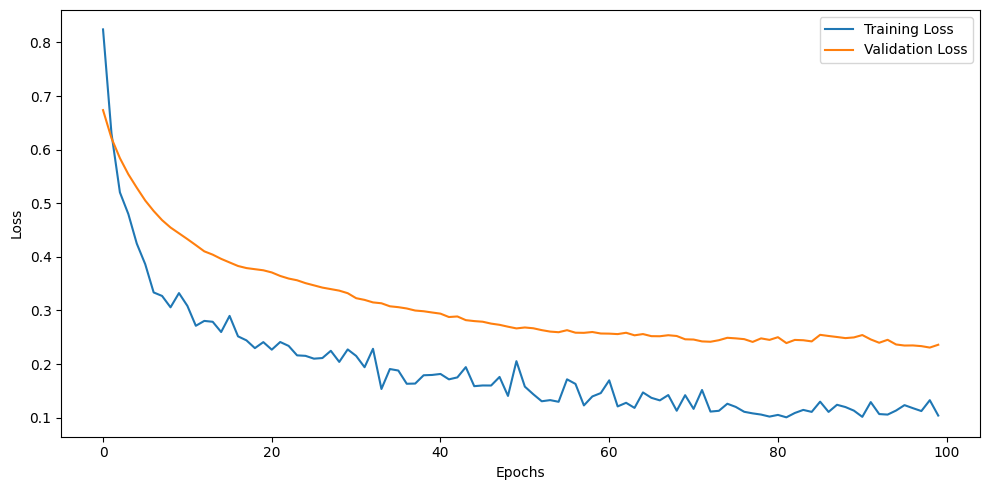

In [265]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

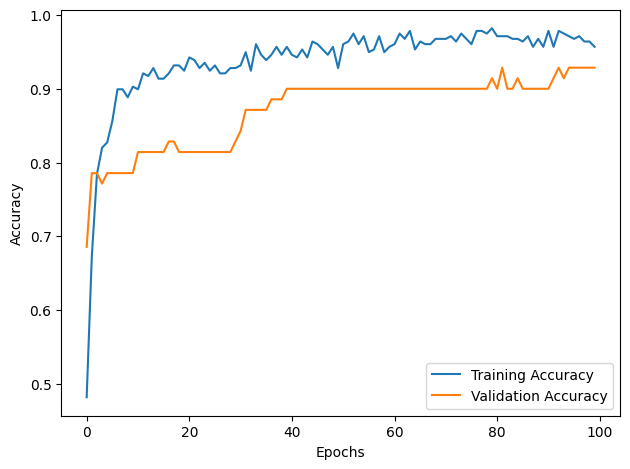

In [266]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()